# Entanglement assisted delayed choice experiment 

In [1]:
import numpy
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import IBMQ, Aer
from math import pi
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
provider = IBMQ.load_account()

In [16]:
alpha = [0,pi/8, pi/4, 3*pi/8, pi/2]
phi = np.arange(0,21*pi/10,pi/10)
#alpha1, phi1 =np.meshgrid(alpha,phi)
phi1, alpha1 = np.meshgrid(phi, alpha)
X = alpha1
Y = phi1

count_list1=[]
count_list=[]

for x in alpha:
    for y in phi:
        c = ClassicalRegister (2, 'c')
        q = QuantumRegister(3, 'q')
        qc = QuantumCircuit(q,c)
        qc.h(q[1])
        qc.cx(q[1],q[2])
        qc.h(q[0])
        qc.u3(2*x,pi,pi,q[2])
        qc.u1(y,q[0])
        qc.ch(q[1],q[0])
        qc.measure(q[0], c[0])
        qc.measure(q[2], c[1])
        #backend = provider.get_backend('ibmq_qasm_simulator')
        backend = Aer.get_backend('qasm_simulator')
        shots=8192
        # Compile and run the Quantum Program on a real device backend
        job_exp = execute(qc, backend=backend, shots=8192)
        result = job_exp.result()
        counts=result.get_counts(qc)
        if '00' in list(counts):
            count_list1.append(counts['00']/shots)
        else:
            count_list1.append(0)
    count_list.append(count_list1)
    count_list1=[]

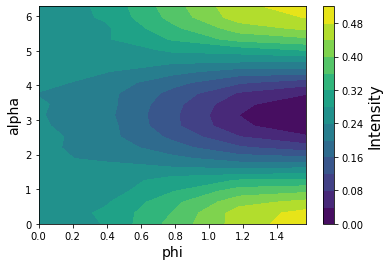

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(X, Y, count_list, 14)
#plt.contourf(X, Y, Fidelity_list2, 15)

cbar=plt.colorbar()
cbar.set_label('Intensity', size=15)
plt.xlabel("phi", color="black",size=14)
plt.ylabel("alpha", color='black',size=14)
#plt.savefig('DCE.png', dpi=600)
plt.show()